In [517]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from random import random

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "./data/mouse_drug_data.csv"
clinical_trial_data_to_load = "./data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)
mouse_data.head()

# Combine the data into a single dataset
combined_data = pd.merge(mouse_data, trial_data, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [518]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
grouped_by_drugtime = combined_data.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
grouped_drug_df = pd.DataFrame(grouped_by_drugtime['Tumor Volume (mm3)']).reset_index()

cap_data = grouped_drug_df[grouped_drug_df['Drug'] == 'Capomulin']
cef_data = grouped_drug_df[grouped_drug_df['Drug'] == 'Ceftamin']
inf_data = grouped_drug_df[grouped_drug_df['Drug'] == 'Infubinol']
ket_data = grouped_drug_df[grouped_drug_df['Drug'] == 'Ketapril']

# Preview DataFrame
grouped_drug_df.head(100)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [519]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_data = combined_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
#tumor_data.head()

# Convert to DataFrame
tumor_data_df = pd.DataFrame(tumor_data).reset_index()

cap_sem_data = grouped_drug_df[grouped_drug_df['Drug'] == 'Capomulin']
cef_sem_data = grouped_drug_df[grouped_drug_df['Drug'] == 'Ceftamin']
inf_sem_data = grouped_drug_df[grouped_drug_df['Drug'] == 'Infubinol']
ket_sem_data = grouped_drug_df[grouped_drug_df['Drug'] == 'Ketapril']

# Preview DataFrame
tumor_data_df.head()
#

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [520]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df = grouped_drug_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
print(reformat_df)

#reformat_err = tumor_data_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
#print(reformat_err)

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zonifer

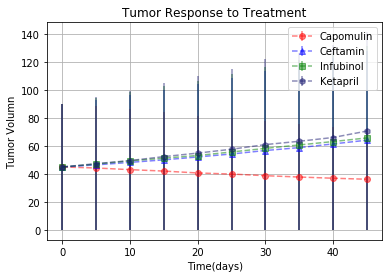

In [521]:
# Generate the Plot (with Error Bars)

plt.errorbar(cap_data['Timepoint'], 
             cap_data['Tumor Volume (mm3)'], 
             yerr=cap_sem_data['Tumor Volume (mm3)'], 
             color="r", 
             alpha=0.5,
             linestyle="--",
             marker="o",
             label="Capomulin")
plt.errorbar(cef_data['Timepoint'], 
             cef_data['Tumor Volume (mm3)'], 
             yerr=cef_sem_data['Tumor Volume (mm3)'], 
             color="b", 
             alpha=0.5,
             linestyle="--",
             marker="^",
             label="Placebo")
plt.errorbar(inf_data['Timepoint'], 
             inf_data['Tumor Volume (mm3)'], 
             yerr=inf_sem_data['Tumor Volume (mm3)'], 
             color="g", 
             alpha=0.5,
             linestyle="--",
             marker="s",
             label="Infubinol")
plt.errorbar(ket_data['Timepoint'], 
             ket_data['Tumor Volume (mm3)'], 
             yerr=ket_sem_data['Tumor Volume (mm3)'], 
             color="midnightblue", 
             alpha=0.5,
             linestyle="--",
             marker="h",
             label="Ketapril")
plt.legend( loc=('best'))
plt.grid(zorder=0)
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volumn")
plt.xlabel("Time(days)")
# Save the Figure
pe1 = plt.savefig('Tumor-Volume-By-Drug.png')


In [475]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [502]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_by_met = combined_data.groupby(["Drug", "Timepoint"]).mean()
grouped_met_df = pd.DataFrame(grouped_by_met['Metastatic Sites']).reset_index()
# Convert to DataFrame
cap_data = grouped_met_df[grouped_met_df['Drug'] == 'Capomulin']
inf_data = grouped_met_df[grouped_met_df['Drug'] == 'Infubinol']
ket_data = grouped_met_df[grouped_met_df['Drug'] == 'Ketapril']
cef_data = grouped_met_df[grouped_met_df['Drug'] == 'Placebo']
#print(cap_data['Metastatic Sites'])
# Preview DataFrame
print(grouped_met_df)

         Drug  Timepoint  Metastatic Sites
0   Capomulin          0          0.000000
1   Capomulin          5          0.160000
2   Capomulin         10          0.320000
3   Capomulin         15          0.375000
4   Capomulin         20          0.652174
5   Capomulin         25          0.818182
6   Capomulin         30          1.090909
7   Capomulin         35          1.181818
8   Capomulin         40          1.380952
9   Capomulin         45          1.476190
10   Ceftamin          0          0.000000
11   Ceftamin          5          0.380952
12   Ceftamin         10          0.600000
13   Ceftamin         15          0.789474
14   Ceftamin         20          1.111111
15   Ceftamin         25          1.500000
16   Ceftamin         30          1.937500
17   Ceftamin         35          2.071429
18   Ceftamin         40          2.357143
19   Ceftamin         45          2.692308
20  Infubinol          0          0.000000
21  Infubinol          5          0.280000
22  Infubin

In [507]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metasta_data = combined_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
#tumor_data.head()

# Convert to DataFrame
metastat_data_df = pd.DataFrame(metasta_data).reset_index()

cap_sem_data = metastat_data_df[metastat_data_df['Drug'] == 'Capomulin']
inf_sem_data = metastat_data_df[metastat_data_df['Drug'] == 'Infubinol']
ket_sem_data = metastat_data_df[metastat_data_df['Drug'] == 'Ketapril']
cef_sem_data = metastat_data_df[metastat_data_df['Drug'] == 'Placebo']

# Preview DataFrame
metastat_data_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [508]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df = grouped_met_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
print(reformat_df)


Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
10          0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
15          0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
20          0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   
25          0.818182  1.500000   1.277778  1.631579  1.500000  1.941176   
30          1.090909  1.937500   1.588235  2.055556  2.066667  2.266667   
35          1.181818  2.071429   1.666667  2.294118  2.266667  2.642857   
40          1.380952  2.357143   2.100000  2.733333  2.466667  3.166667   
45          1.476190  2.692308   2.111111  3.363636  2.538462  3.272727   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                     

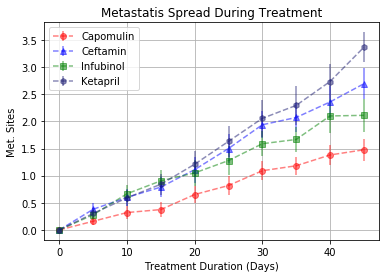

In [510]:
# Generate the Plot (with Error Bars)
#print(cap_data['Metastatic Sites'])
plt.errorbar(cap_data['Timepoint'], 
             cap_data['Metastatic Sites'], 
             yerr=cap_sem_data['Metastatic Sites'], 
             color="r", 
             alpha=0.5,
             linestyle="--",
             marker="o",
             label="Capomulin")
plt.errorbar(cef_data['Timepoint'], 
             cef_data['Metastatic Sites'], 
             yerr=cef_sem_data['Metastatic Sites'], 
             color="b", 
             alpha=0.5,
             linestyle="--",
             marker="^",
             label="Placebo")
plt.errorbar(inf_data['Timepoint'], 
             inf_data['Metastatic Sites'], 
             yerr=inf_sem_data['Metastatic Sites'], 
             color="g", 
             alpha=0.5,
             linestyle="--",
             marker="s",
             label="Infubinol")
plt.errorbar(ket_data['Timepoint'], 
             ket_data['Metastatic Sites'], 
             yerr=ket_sem_data['Metastatic Sites'], 
             color="midnightblue", 
             alpha=0.5,
             linestyle="--",
             marker="h",
             label="Ketapril")
plt.legend( loc=('best'))
plt.title("Metastatis Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(zorder=0)
# Save the Figure
pe1 = plt.savefig('Metastatic-Sites-By-Drug.png')

# Show the Figure
plt.show()

## Survival Rates

In [511]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_by_mc = combined_data.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
grouped_mc_df = pd.DataFrame(grouped_by_mc["Mouse ID"].count()).reset_index()
grouped_mc_df.rename(columns={'Mouse ID': 'Mouse Count'}, inplace=True)
# Preview DataFrame
grouped_mc_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [512]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df = grouped_mc_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview that Reformatting worked
reformat_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


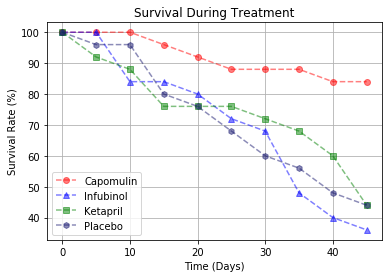

In [513]:
# Generate the Plot (Accounting for percentages)
cap_data = grouped_mc_df[grouped_mc_df['Drug'] == 'Capomulin']
pert_cap_data = [(x*100/max(cap_data['Mouse Count'])) for x in cap_data['Mouse Count']]

inf_data = grouped_mc_df[grouped_mc_df['Drug'] == 'Infubinol']
pert_inf_data = [(x*100/max(inf_data['Mouse Count'])) for x in inf_data['Mouse Count']]

ket_data = grouped_mc_df[grouped_mc_df['Drug'] == 'Ketapril']
pert_ket_data = [(x*100/max(ket_data['Mouse Count'])) for x in ket_data['Mouse Count']]

pla_data = grouped_mc_df[grouped_mc_df['Drug'] == 'Placebo']
pert_pla_data = [(x*100/max(pla_data['Mouse Count'])) for x in pla_data['Mouse Count']]

plt.errorbar(cap_data['Timepoint'], 
             pert_cap_data,  
             color="r", 
             alpha=0.5,
             linestyle="--",
             marker="o",
             label="Capomulin")
plt.errorbar(inf_data['Timepoint'], 
             pert_inf_data,  
             color="b", 
             alpha=0.5,
             linestyle="--",
             marker="^",
             label="Infubinol")
plt.errorbar(ket_data['Timepoint'], 
             pert_ket_data,
             color="g", 
             alpha=0.5,
             linestyle="--",
             marker="s",
             label="Ketapril")
plt.errorbar(pla_data['Timepoint'], 
             pert_pla_data, 
             color="midnightblue", 
             alpha=0.5,
             linestyle="--",
             marker="h",
             label="Placebo")
plt.legend( loc=('best'))
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(zorder=0)
# Save the Figure
pe1 = plt.savefig('survival-rate-in-days.png')

# Show the Figure
plt.show()
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [516]:
# Calculate the percent changes for each drug
drugs = grouped_drug_df['Drug'].unique()
all_drugs_df['Drug'] = pd.DataFrame(drugs)
perc_by_drug = {}
per_list = []
for drug in all_drugs:
    #drugs.append(drug)
    drug_data = grouped_drug_df[grouped_drug_df['Drug'] == drug]
    tumor_size = drug_data['Tumor Volume (mm3)'].tolist()
    percentage = (tumor_size[len(tumor_size)-1] - tumor_size[0]) * 100 /tumor_size[0]
    per_list.append(percentage)
    perc_by_drug[drug] = percentage
    #percentage.append([(tumor_size[len(tumor_size)-1] - tumor_size[0]) * 100 /tumor_size[0]])
all_drugs_df['Percentage'] = per_list 
# Display the data to confirm
all_drugs_df.head()

,0,Percentage,Drug
0,Capomulin,-19.475303,Capomulin
1,Ceftamin,42.516492,Ceftamin
2,Infubinol,46.123472,Infubinol
3,Ketapril,57.028795,Ketapril
4,Naftisol,53.923347,Naftisol


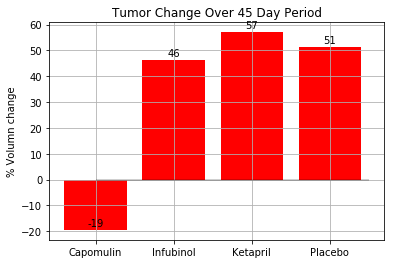

In [515]:
# Store all Relevant Percent Changes into a Tuple
def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

        
drug_data = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
x_axis = np.arange(len(drug_data))
tumor_change_data = []
for x in drug_data:
    tumor_change_data.append(perc_by_drug[x])
# Splice the data between passing and failing drugs
#print(tumor_change_data)

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
rects1 = ax.bar(x_axis, tumor_change_data, color='r')
plt.hlines(0, 0, len(tumor_change_data)-0.5, alpha=0.25)
plt.grid(zorder=0)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_data)

plt.title("Tumor Change Over 45 Day Period")
plt.ylabel("% Volumn change")
# Use functions to label the percentages of changes
autolabel(rects1, ax)

# Call functions to implement the function calls


# Save the Figure
pe1 = plt.savefig('tumor-change.png')

# Show the Figure
#fig.show()